In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.simplefilter(action = 'ignore')

In [5]:
df = pd.read_csv("diabetes-1.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y = df.iloc[:,-1:]

In [8]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [9]:
x = df.iloc[:,:-1]

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= .30, random_state =2)

In [13]:
logistic = LogisticRegression()

In [14]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [15]:
predicted = logistic.predict(x_test)

In [16]:
predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
accuracy = logistic.score(x_test,y_test)

In [18]:
accuracy

0.7619047619047619

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix = confusion_matrix(y_test,predicted)

In [21]:
print(confusion_matrix)

[[139  16]
 [ 39  37]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       155
           1       0.70      0.49      0.57        76

    accuracy                           0.76       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



<AxesSubplot:>

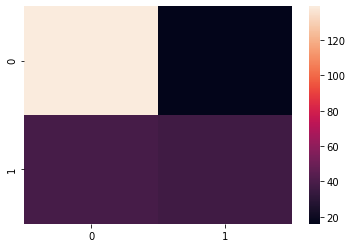

In [34]:
sns.heatmap(confusion_matrix)

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve

In [45]:
from sklearn import metrics

In [57]:
auc = roc_auc_score(y_test,predicted)

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted)

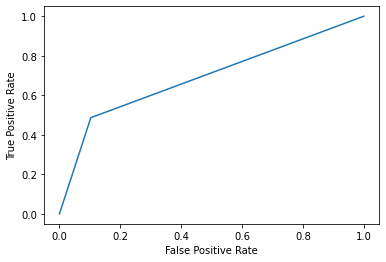

In [52]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

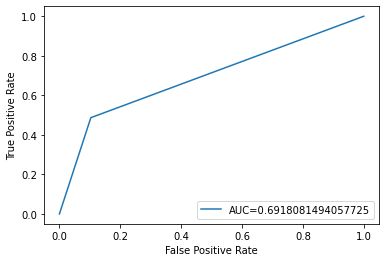

In [60]:
plt.plot(fpr,tpr,label ="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()